# Der Iris-Datensatz
Der Iris-Datensatz wurde durch den US-amerikanischen Biologen [Edgar Anderson](https://en.wikipedia.org/wiki/Edgar_Anderson) in den 1930er Jahren erhoben. Es wird heute als Standarddatensatz zum Training von Modellen im Bereich machinellem Lernen verwendet.

Der Datensatz ist bereits Teil der sklearn-Bibliothek, so dass er nicht als Datei eingelesen werden muss. Er enthält Angaben über Länge und Breite der Sepalen und Petalen der folgenden Iris-Arten (Schwertlilien). Von links nach rechts Setosa, Versicolor, Virginica

<img float="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/330px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="margin:5px" align="left" width=20%> 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/330px-Iris_versicolor_3.jpg" style="margin:5px" align="left" width=36%> 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/330px-Iris_virginica.jpg" style="margin:5px" width =33%>

Bilder Wikipedia:
<https://en.wikipedia.org/wiki/Iris_flower_data_set>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Bluete-Schema.svg/375px-Bluete-Schema.svg.png" style="margin-right:50px" width = 20% align="left">

1 Blütenboden (Receptaculum)  
2 Kelchblätter (Sepalen)  
3 Kronblätter (Petalen)  
4 Staubblätter (Stamina)  
5 Stempel (Pistill)  

Bild Wikipedia: <https://de.wikipedia.org/wiki/Kelchblatt>

# Einlesen der Daten und erster Überblick

In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])
iris_df['Iris type'] = iris_data['target']
iris_df['Iris name'] = iris_df['Iris type'].apply(
    lambda x: 'setosa' if x == 0 else ('versicolor' if x == 1 else 'virginica')
)

In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Iris name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [134]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [133]:
iris_df.groupby(['Iris name']).describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
Iris name                                                                  
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal width (cm)      Iris type       \
                      count   mean  ...              75%  max     count mean   
Iris name                           ...                                        
setosa                 50.0  3.428  ...              0.3  0.6      50.0  0.0   
versicolor             50.0  2.770  ...              1.5  1.8      50.0  1.0   
virginica              50.0  2.974  ...              2.3  2.5      50.0  2.0   

                                          
            std  min  25%  50%  75%  max  
Iris name                                 
setosa      0.0  0.0  0.0  0.0  0.0  0.0  
versicolor  0.0  1.0  1.0  1.0  1.0  1.0  
virginica   0.0  2.0  2.0  2.0  2.0  2.0  

[3 rows x 40 columns]

## Optional: graphischer Überblick

In [20]:
import matplotlib.pyplot as plt

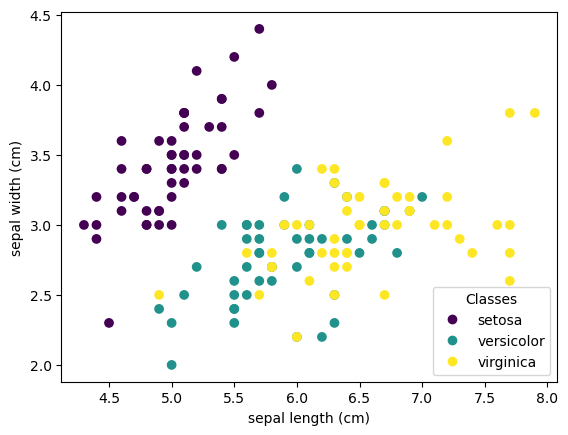

In [29]:
_, ax = plt.subplots()
scatter = ax.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=iris_data.target)
ax.set(xlabel=iris_data.feature_names[0], ylabel=iris_data.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris_data.target_names, loc="lower right", title="Classes"
)
plt.show()

# Split in Trainigs- und Testdaten

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = iris_df['Iris name']

In [112]:
training_size = 112   # 112 entspricht 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = training_size, random_state = None)

# Training des Modells (mit den Trainings-Daten)

In [31]:
from sklearn import tree
import matplotlib as plt

In [38]:
features = ['sep-l', 'sep-w', 'pet-l','pet-w']
# features = ['sepal length', 'sepal width', 'pet als length','petal width']
classes = ['sentosa','versicolor','virginica']

In [92]:
tiefe_baum = 2
clf = tree.DecisionTreeClassifier(max_depth=tiefe_baum)
clf.fit(X_train, y_train)
print("Korrekt klassifizierte Trainingsdaten:", clf.score(X_train, y_train)*100, "%")
print("Korrekt klassifizierte Testdaten:     ", clf.score(X_test, y_test)*100, "%")

Korrekt klassifizierte Trainingsdaten: 94.64285714285714 %
Korrekt klassifizierte Testdaten:      100.0 %


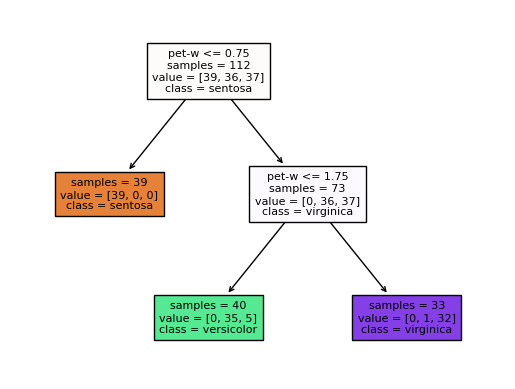

In [80]:
tree.plot_tree( clf, feature_names=features, #label='None',
                        filled=True,
                        class_names=classes, impurity=False,
                        proportion=False, fontsize=8 )
plt.pyplot.show()

# Validierung (mit den Test-Daten)

In [81]:
import numpy as np

In [82]:
pred = clf.predict(X_test)

In [83]:
correct = 0
for i in range( len(pred) ):
    if pred[i] == np.array(y_test)[i]:
        correct += 1
print("Anzahl korrekte:", correct, "von", len(y_test))
print("Prozent korrekt:", correct / len(y_test)*100, "%")

Anzahl korrekte: 38 von 38
Prozent korrekt: 100.0 %


# Anderes Modell: K-Nearest Neighbors

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [131]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [132]:
print("Korrekt klassifiziert", knn.score(X_test, y_test), "%")

Korrekt klassifiziert 0.9473684210526315 %
